In [1]:
import pandas as pd
import re

In [2]:
data_dir = '../data/'

#### How much are phytochemicals in drugs?

In [3]:
drug_ingredients = pd.read_csv(data_dir + 'drugbank/drug_id_name_map.csv', index_col=[0])
drug_ingredients.head()

id            drug_name
1  DB00001            Lepirudin
2  DB00002            Cetuximab
3  DB00003         Dornase alfa
4  DB00004  Denileukin diftitox
5  DB00005           Etanercept

In [4]:
with open(data_dir + 'phytochemicals.txt', 'r') as f:
    lines = f.readlines()  

phytochemicals = [re.sub('\n', '', x) for x in lines]   
phytochemicals = [x.lower() for x in phytochemicals] 

print(phytochemicals[:10])
phytochemicals = set(phytochemicals)

['phytoene', 'zeaxanthin', 'lentinan', 'farnesyl pyrophosphate', 'pentose', 'carotene, gamma', 'theogallin', 'pectin', 'cembrene', 'pimaric acid']


In [5]:
drug_names = set(drug_ingredients.drug_name)

drugs_with_phytochemicals = dict()
phytochemicals_in_drugs = set()

phytochemicals = list(phytochemicals)

for drug_name in drug_names:
    ingredient = drug_name.lower()

    if ingredient in phytochemicals:
        drugs_with_phytochemicals[drug_name] = phytochemicals.index(ingredient)
        phytochemicals_in_drugs.add(ingredient)


print(phytochemicals_in_drugs)
print()
print('Number of drugs that contains phytochemicals:', len(drugs_with_phytochemicals), '/ out of', len(drug_names))

{'paclitaxel', 'tryptophan', 'beta carotene', 'testosterone', 'menthol', 'betulinic acid', 'phenol', 'cholesterol', 'geraniol', 'capsaicin', 'inulin', 'tannic acid', 'cholecalciferol', 'tocopherol', 'lycopene', 'camphor', 'phenylalanine', 'hesperidin', 'curcumin', 'tyrosine', 'thymol', 'salicylic acid', 'pectin', 'lutein', 'zeaxanthin', 'rutin'}

Number of drugs that contains phytochemicals: 26 / out of 4225


### Data Analysis
(in training dataset)

#### Drugs

In [6]:
drug_inchi_key = pd.read_csv(data_dir + 'triplets/drugs_inchi_key.tsv', sep='\t', index_col=[0])
print(drug_inchi_key.head(3))
print()


drug_subclass = pd.read_csv(data_dir + 'triplets/drug_subclass.tsv', sep='\t', index_col=[0])
print(drug_subclass.head(3))
print()

drug_salts = pd.read_csv(data_dir + 'triplets/drug_salts.tsv', sep='\t', index_col=[0])
print(drug_salts.head(3))
print()

drug_ingredients = pd.read_csv(data_dir + 'triplets/ingredients.tsv', sep='\t', index_col=[0])
print(drug_ingredients.head(3))
print()

drug_interactions = pd.read_csv(data_dir + 'triplets/ddi.tsv', sep='\t', index_col=[0])
print(drug_interactions.head(3))
print()

        id       relation                    inchi_key
1  DB00006  has_inchi_key  OIRCOABEOLEUMC-GEJPAHFPSA-N
2  DB00007  has_inchi_key  GFIJNRVAKGFPGQ-LIJARHBVSA-N
3  DB00014  has_inchi_key  BLCLNMBMMGCOAS-URPVMXJPSA-N

        id     relation subclass
1  DB00001  in_subclass  class_0
2  DB00002  in_subclass  class_0
3  DB00003  in_subclass  class_0

      drug  relation       salt_id
1  DB00007  contains  DBSALT000105
2  DB00007  contains  DBSALT003182
3  DB00010  contains  DBSALT001439

   drug_name  relation ingredient
0   refludan  contains    DB00001
1    erbitux  contains    DB00002
2  pulmozyme  contains    DB00003

     drug1                        interaction    drug2
0  DB06605  increase_anticoagulant_activities  DB00001
1  DB06695  increase_anticoagulant_activities  DB00001
2  DB01254                  increase_bleeding  DB00001



#### Food

In [7]:
food_compounds = pd.read_csv(data_dir + 'triplets/food_compound.tsv', sep='\t', index_col=[0])
print(food_compounds.head())
print()

compounds_cas_num = pd.read_csv(data_dir + 'triplets/compounds_cas_number.tsv', sep='\t', index_col=[0])
print(compounds_cas_num.head())
print()

     food_id  relation compound_id
0  FOOD00001  contains   FDB013255
1  FOOD00001  contains   FDB011904
2  FOOD00002  contains   FDB014613
3  FOOD00002  contains   FDB008322
4  FOOD00002  contains   FDB000474

  compound_id        relation cas_number
0   FDB015503  has_cas_number   469-38-5
1   FDB002558  has_cas_number   331-39-5
2   FDB000474  has_cas_number    56-87-1
3   FDB002251  has_cas_number    54-12-6
4   FDB000633  has_cas_number   520-18-3



#### Drug Supplements

In [8]:
ds_ingredients = pd.read_csv(data_dir + 'triplets/ds_ingredients.tsv', sep='\t', index_col=[0])
print(ds_ingredients.head())
print()

ds_relations = pd.read_csv(data_dir + 'triplets/ds_relations.tsv', sep='\t', index_col=[0])
print(ds_relations.head())
print()

                                        CUI1             REL   
0     Douglas Laboratories - L-Lysine 500 mg  has_ingredient  \
1  Met-Rx - Pure Protein Shake Vanilla Cream  has_ingredient   
2  Met-Rx - Pure Protein Shake Vanilla Cream  has_ingredient   
3  Met-Rx - Pure Protein Shake Vanilla Cream  has_ingredient   
4  Met-Rx - Pure Protein Shake Vanilla Cream  has_ingredient   

                    CUI2  
0     L-Lysine Free Form  
1             Saccharide  
2     Sodium-D-aspartate  
3          Oleovitamin A  
4  Magnesium Trisilicate  

                               CUI1             REL   
689301  1-Androsten-3beta-ol-17-one  interacts_with  \
689302                       4-DHEA  interacts_with   
689319                    Blackbush  interacts_with   
689320                    Blackbush  interacts_with   
689322                    Blackbush  interacts_with   

                                  CUI2  
689301                    Testosterone  
689302                    Testosterone 

## Graph visualization

In [9]:
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import nn
from torch import Tensor
import torch_geometric
from torch_geometric.nn import GCNConv
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import WebKB
import torch_geometric.transforms as T
from torch_geometric.data import Data
import networkx as nx
from networkx.algorithms import community
from ogb.linkproppred import Evaluator, PygLinkPropPredDataset
import random
import itertools
from operator import itemgetter

In [10]:
!pip3 install pyvis

ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/base_command.py", line 186, in _main
    status = self.run(options, args)
  File "/usr/lib/python3/dist-packages/pip/_internal/commands/install.py", line 315, in run
    wheel_cache = WheelCache(options.cache_dir, options.format_control)
  File "/usr/lib/python3/dist-packages/pip/_internal/cache.py", line 291, in __init__
    self._ephem_cache = EphemWheelCache(format_control)
  File "/usr/lib/python3/dist-packages/pip/_internal/cache.py", line 267, in __init__
    self._temp_dir = TempDirectory(kind="ephem-wheel-cache")
  File "/usr/lib/python3/dist-packages/pip/_internal/utils/temp_dir.py", line 116, in __init__
    path = self._create(kind)
  File "/usr/lib/python3/dist-packages/pip/_internal/utils/temp_dir.py", line 164, in _create
    tempfile.mkdtemp(prefix="pip-{}-".format(kind))
  File "/usr/lib/python3.8/tempfile.py", line 497, in mkdtemp
    _os.mkdir(file, 0o700)
OSE

In [11]:
from pyvis.network import Network

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### BioKG

In [13]:
dataset_dir = '../data/dataset-ogb/'

dataset = PygLinkPropPredDataset(name='ogbl-ddi', root=dataset_dir, transform=T.ToSparseTensor())
data = dataset[0]

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')

Number of nodes: 4267
Number of edges: 2135822


In [14]:
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [15]:
split_edge = dataset.get_edge_split()
train_edge, valid_edge, test_edge = split_edge["train"], split_edge["valid"], split_edge["test"]
train_edge

{'edge': tensor([[4039, 2424],
         [4039,  225],
         [4039, 3901],
         ...,
         [ 647,  708],
         [ 708,  338],
         [ 835, 3554]])}

In [16]:
def random_sample(edge_index, num_nodes, k=10):
    nodes_idx = random.sample(range(num_nodes), k)
    mask = torch.from_numpy(np.isin(edge_index, nodes_idx).sum(axis=0) > 0)
    mask = mask.expand(2,-1)

    # select just edges with generated node index (nodes_idx)
    edge_index_sample = edge_index * mask 

    # get rid of 0s columns
    non_empty_mask = edge_index_sample.sum(dim=0).bool()
    edge_index_sample = edge_index_sample[:,non_empty_mask]
    
    return edge_index_sample

In [17]:
edge_index_sample = random_sample(torch.transpose(train_edge['edge'], 0, 1), data.num_nodes)
edge_index_sample

tensor([[4039, 4039, 4039,  ..., 1257, 1257, 1257],
        [3616,  861, 2330,  ...,  588,  995, 1061]])

In [18]:
num_nodes = edge_index_sample.unique()
# num_nodes.size(0)
data = Data(edge_index=edge_index_sample, num_nodes=num_nodes.size(0))
data

Data(edge_index=[2, 4952], num_nodes=2650)

In [19]:
edge_index = data.edge_index.numpy()
print(edge_index.shape)
index = 225
edge_example_outward = edge_index_sample[:, np.where(edge_index_sample[0]==index)[0]]
edge_example_inward = edge_index_sample[:, np.where(edge_index_sample[1] == index)[0]]
edge_example_outward

(2, 4952)


tensor([[ 225,  225,  225,  225,  225],
        [ 861, 2330, 3616, 1157,  944]])

In [20]:
edge_example_inward.shape

torch.Size([2, 0])

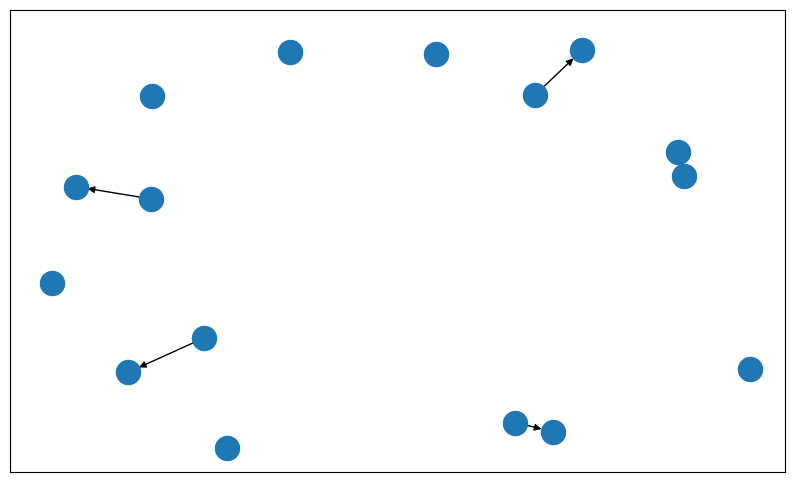

In [25]:
node_example = np.unique(np.concatenate(
    [edge_example_outward.flatten(), edge_example_inward.flatten()]))
plt.figure(figsize=(10, 6))
G = nx.DiGraph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example_outward[0], edge_example_outward[1])))
G.add_edges_from(list(zip(edge_example_inward[0], edge_example_inward[1])))
nx.draw_networkx(G, with_labels=False)

In [26]:
def visuzlize_graph(data):
    G = to_networkx(data, to_undirected=False)
    pos = nx.spring_layout(G, seed=42)
    cent = nx.degree_centrality(G)
    node_size = list(map(lambda x: x * 800, cent.values()))
    cent_array = np.array(list(cent.values()))
    threshold = sorted(cent_array, reverse=True)[10]
    print("threshold", threshold)
    cent_bin = np.where(cent_array >= threshold, 1, 0.1)
    plt.figure(figsize=(12, 12))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                                   cmap=plt.cm.viridis,
                                   node_color=cent_bin,
                                   nodelist=list(cent.keys()),
                                   alpha=cent_bin)
    labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))
    edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.6)
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_names, font_color='red', font_size=12, font_weight='normal')
    plt.show()

### DrugBank data

In [27]:
my_data = 'triplets/train_drugbank.tsv'
data_df = pd.read_csv(data_dir + my_data, sep='\t')
data_df = data_df.dropna()

In [28]:
nodes = data_df[['head', 'tail']].stack().unique()
print('Number of unique nodes:', len(nodes))
nodes_map = {node: i for i, node in enumerate(nodes)}

edges = data_df['relation'].unique()
edges_map = {edge: i for i, edge in enumerate(edges)}
print('Number of unique edges:', len(edges))

Number of unique nodes: 19917
Number of unique edges: 7


In [29]:
heads = data_df['head'].map(nodes_map)
tails = data_df['tail'].map(nodes_map)

In [30]:
edges = torch.tensor([heads.values, tails.values])

/tmp/ipykernel_1125/1872461729.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  edges = torch.tensor([heads.values, tails.values])


In [31]:
IDX = 'DB00008'
node_id = nodes_map[IDX]

In [32]:
def random_sample(G, k=100):
    sampled_nodes = random.sample(G.nodes, k)
    return G.subgraph(sampled_nodes)
    

data_graph = Data(edge_index=edges, num_nodes=len(nodes))
G = to_networkx(data_graph, to_undirected=False)
G_subgraph = random_sample(G)

In [33]:
def particular_sample(nodes_idx, edge_index):
    mask = torch.from_numpy(np.isin(edge_index, nodes_idx).sum(axis=0) > 0)
    mask = mask.expand(2,-1)

    # select just edges with generated node index (nodes_idx)
    edge_index_sample = edge_index * mask 

    # get rid of 0s columns
    non_empty_mask = edge_index_sample.sum(dim=0).bool()
    edge_index_sample = edge_index_sample[:,non_empty_mask]
    
    return edge_index_sample

In [34]:
# edges_sample = random_sample(edges, len(nodes), k=5)
edges_sample = particular_sample([node_id], edges)
print(edges_sample)
num_nodes = edges_sample.unique()
print('number of unique nodes:', num_nodes.size(0))
data_sample = Data(edge_index=edges_sample, num_nodes=num_nodes.size(0))
# visuzlize_graph(data_sample)

tensor([[ 1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,  1647,
          1647,  1647,  1647,  1647,  1647,  1647,  

## Analyze the training data (graph)

- number of drug-drug or drug-food realtions in training data 
- node degree
- number of node types
- number of edges
- connections of enzymes/pathways to drugs

In [35]:
# number of drug-drug or drug-food realtions in training data

data_df['node_type'] = list(itertools.repeat('xxx', data_df.shape[0]))
data_df.loc[data_df['tail'].str.contains("DB\d+", regex=True), 'node_type'] = "drug"
data_df.loc[data_df['tail'].str.contains("FOOD"), 'node_type'] = "food"
data_df = data_df.loc[data_df['node_type'] != 'xxx']
data_df

head   relation       tail node_type
0         DB01424  interacts    DB00384      drug
1         DB00292  interacts    DB00282      drug
2         DB01428  interacts    DB00872      drug
3         DB12474  interacts    DB00054      drug
4         DB11641  interacts    DB01016      drug
...           ...        ...        ...       ...
656817  FOOD00991   contains  FDB012535      drug
656818  FOOD00991   contains  FDB000484      drug
656819  FOOD00992   contains  FDB012160      drug
656820  FOOD00992   contains  FDB001014      drug
656821  FOOD00992   contains  FDB008322      drug

[560227 rows x 4 columns]

In [36]:
dd_interactions_count = data_df[(data_df['node_type'] == 'drug') & (data_df['head'].str.match(r'DB\d+'))].shape[0]
df_interactions_count = data_df[(data_df['node_type'] == 'food') & (data_df['head'].str.match(r'DB\d+'))].shape[0]

print(f'Number of drug-drug relations in training data: {dd_interactions_count}')
print(f'Number of drug-food relations in training data: {df_interactions_count}')

Number of drug-drug relations in training data: 546492
Number of drug-food relations in training data: 761


count   mean     std  min  25%  50%   75%     max
0  19917.0  67.67  192.54  1.0  2.0  5.0  15.0  1634.0

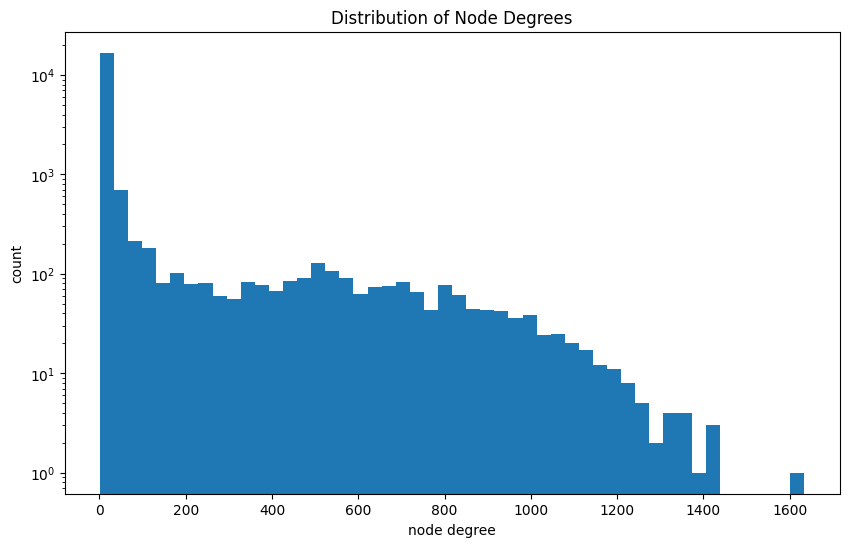

In [37]:
data = Data(edge_index=edges, num_nodes=len(nodes))

G = to_networkx(data, to_undirected=False)
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
# print(len(degrees))
# print(sum(degrees))
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.xlabel("node degree")
plt.ylabel("count")
plt.yscale('log')
plt.title('Distribution of Node Degrees')
plt.show()

In [38]:
# node type distribution

# DB... - drug
# FOOD... - food
# FDB... - food compound
# cas number
# DBSALT... - drug salt
# subclass
# protein_...
# sideeffect_...
# disease_...
# SMP... - pathway
# pathway category 
# P/Q... - enzyme

# 12 types of nodes
nodes_list = data_df[['head', 'tail']].stack().unique()
nodes_df = pd.DataFrame({'node_id': nodes_list})

# it may be incorrect in some cases ??
nodes_df['node_type'] = list(itertools.repeat('cas_num', nodes_df.shape[0]))
nodes_df.loc[nodes_df['node_id'].str.contains("DB"), 'node_type'] = "drug"
nodes_df.loc[nodes_df['node_id'].str.contains("FOOD"), 'node_type'] = "food"
nodes_df.loc[nodes_df['node_id'].str.contains("FDB"), 'node_type'] = "food_compound"
nodes_df.loc[nodes_df['node_id'].str.contains("DBSALT"), 'node_type'] = "salt"
nodes_df.loc[nodes_df['node_id'].str.contains("class"), 'node_type'] = "drug_class"
nodes_df.loc[nodes_df['node_id'].str.contains("protein"), 'node_type'] = "protein"
nodes_df.loc[nodes_df['node_id'].str.contains("sideeffect"), 'node_type'] = "side_effect"
nodes_df.loc[nodes_df['node_id'].str.contains("disease"), 'node_type'] = "disease"
nodes_df.loc[nodes_df['node_id'].str.contains("SMP"), 'node_type'] = "pathway"
nodes_df.loc[nodes_df['node_id'].str.contains("pathway_cat"), 'node_type'] = "pathway_category"
nodes_df.loc[nodes_df['node_id'].str.contains("^[OPQ]\d+", regex=True), 'node_type'] = "enzyme"

nodes_df_grouped = nodes_df.groupby(by=['node_type']).count()
nodes_df_grouped.columns = ['count']
nodes_df_grouped = nodes_df_grouped.sort_values(by='count', ascending=False)
nodes_df_grouped

count
node_type           
drug            2553
food             791
pathway          758
food_compound    165

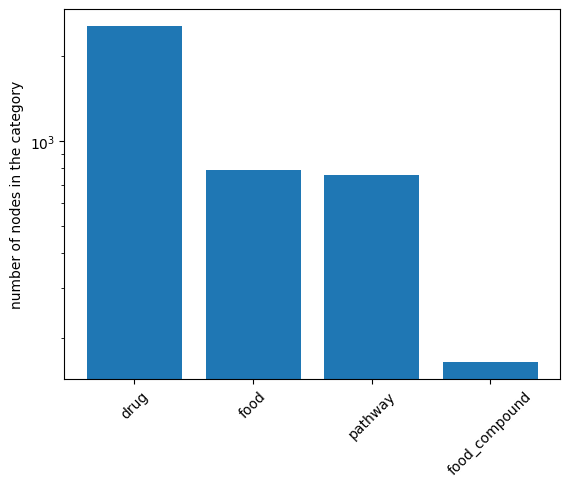

In [39]:
counts = nodes_df_grouped['count'].values
node_types = nodes_df_grouped.index

plt.bar(node_types, counts)
plt.xticks(rotation = 45) 
plt.yscale('log')
plt.ylabel('number of nodes in the category')
plt.show()

In [40]:
# edge type distribution
edge_types_grouped = data_df.groupby(by=['relation']).count()
edge_types_grouped = edge_types_grouped.drop(columns=['tail', 'node_type'])
edge_types_grouped

head
relation                   
contains              11017
interacts            547253
involved_in_pathway    1957

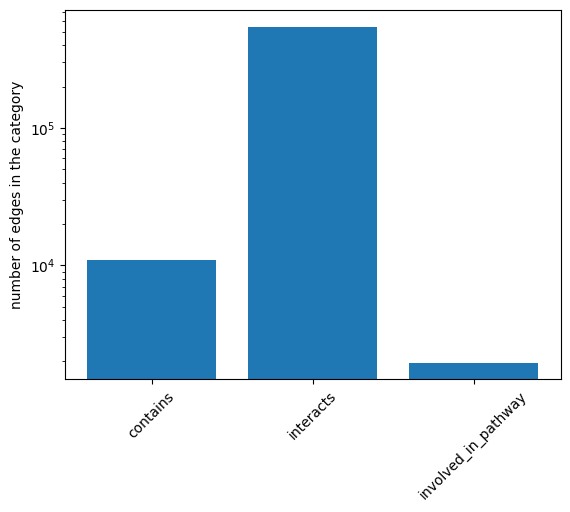

In [41]:
counts = list(edge_types_grouped['head'].values)
edge_types = list(edge_types_grouped.index)

plt.bar(edge_types, counts)
plt.xticks(rotation = 45) 
plt.yscale('log')
plt.ylabel('number of edges in the category')
plt.show()

In [ ]:
# relations_unique = data_df.relation.unique()
# with open('unique_relations.txt', 'w') as f:
#     for rel in relations_unique:
#         f.write(rel + '\n')

In [ ]:
# connections of enzymes/pathways to drugs

In [47]:
# vizualiztion for a specific drug(s)

Following code from https://github.com/kennethleungty/Drug-Interactions-Network-Analysis-and-Visualization/blob/main/02_Network_Analysis_and_Visualization.ipynb

In [42]:
# Generate a networkx graph
G = nx.from_pandas_edgelist(data_df, 'head', 'tail')

# Give the graph a name
G.name = 'Drug Interactions Network'

# Check whether graph is directed or undirected (False = undirected)
print(G.is_directed())

# Obtain general information of graph
# print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

False
Network density: 0.06155318605888627


In [44]:
drug_ingredients

drug_name  relation ingredient
0                           refludan  contains    DB00001
1                            erbitux  contains    DB00002
2                          pulmozyme  contains    DB00003
3                   pulmozyme 1mg/ml  contains    DB00003
4                              ontak  contains    DB00004
...                              ...       ...        ...
846767                act bortezomib  contains    DB16741
846768                    bortezomib  contains    DB16741
846769                pms-bortezomib  contains    DB16741
846770               taro-bortezomib  contains    DB16741
846771  bortezomib for injection sdz  contains    DB16741

[66970 rows x 3 columns]

In [45]:
# Create dictionary to store degrees of nodes
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# Generate sorted list of tuples of drug entity and corresponding degree
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 drugs by degree:")
for d in sorted_degree[:10]:
    d_name = drug_ingredients[drug_ingredients['ingredient'] == d[0]].drug_name.values[0]
    print(d, d_name)

Top 20 drugs by degree:
('DB00477', 1352) thorazine
('DB00363', 1341) clozaril
('DB00908', 1334) quinidine gluconate
('DB09241', 1308) methylene blue
('DB00458', 1298) imipramine pamoate
('DB00091', 1292) cyclosporine
('DB00564', 1283) carbamazepine
('DB00321', 1268) amitriptyline hydrochloride
('DB01149', 1264) nefazodone hydrochloride
('DB00502', 1257) haloperidol


In [46]:
# Get degree centrality (corresponds with degree)
degree_centrality = nx.degree_centrality(G)
degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))
degree_centrality

{'DB00477': 0.31692451945616507,
 'DB00363': 0.3143459915611814,
 'DB00908': 0.31270511017346464,
 'DB09241': 0.3066104078762307,
 'DB00458': 0.3042662916080638,
 'DB00091': 0.30285982184716365,
 'DB00564': 0.3007501172058134,
 'DB00321': 0.2972339428035631,
 'DB01149': 0.29629629629629634,
 'DB00502': 0.2946554149085795,
 'DB00661': 0.2946554149085795,
 'DB01142': 0.29348335677449605,
 'DB00176': 0.2913736521331458,
 'DB01242': 0.2873886544772621,
 'DB00909': 0.2843413033286451,
 'DB01267': 0.28293483356774496,
 'DB00270': 0.2815283638068448,
 'DB01151': 0.2812939521800282,
 'DB04896': 0.27965307079231133,
 'DB01115': 0.27894983591186123,
 'DB00280': 0.2784810126582279,
 'DB06700': 0.2775433661509611,
 'DB00864': 0.27637130801687765,
 'DB01224': 0.27637130801687765,
 'DB08910': 0.2749648382559775,
 'DB00571': 0.27426160337552746,
 'DB00398': 0.27379278012189406,
 'DB00312': 0.27355836849507736,
 'DB09118': 0.2723863103609939,
 'DB00999': 0.2712142522269105,
 'DB00285': 0.2698077824660

In [47]:
# Define function to generate Pyvis visualization
def generate_network_viz(df, source_col, target_col, 
                         layout='repulsion',
                         central_gravity=0.15,
                         node_distance=420,
                         spring_length=100,
                         spring_strength=0.15,
                         damping=0.96
                         ):
    
    # Generate a networkx graph
    G = nx.from_pandas_edgelist(df, source_col, target_col)
    
    if layout == 'repulsion':
        bgcolor, font_color = '#222222', 'white'
    else:
        bgcolor, font_color = 'white', 'black'
    
    # Initiate PyVis network object
    drug_net = Network(
                       height='700px', 
                       width='100%',
                       bgcolor=bgcolor, 
                       font_color=font_color, 
                       notebook=True
                      )
    
    # Take Networkx graph and translate it to a PyVis graph format
    drug_net.from_nx(G)

    drug_net.repulsion(
                        node_distance=node_distance, 
                        central_gravity=central_gravity, 
                        spring_length=spring_length, 
                        spring_strength=spring_strength, 
                        damping=damping
                       )

    return drug_net

In [48]:
# reverse_nodes_map = dict((v, k) for k, v in nodes_map.items())
# edges_sample_names = [[],[]]
# for d in edges_sample[0]:
# #     print(d.item())
#     edges_sample_names[0].append(reverse_nodes_map[d.item()])
# for d in edges_sample[1]:
# #     print(d.item())
#     edges_sample_names[1].append(reverse_nodes_map[d.item()])  

node_name='DB04574'
temp = G.copy(as_view=False) # make a temporary graph to avoid losing original ones
nodelist = list(temp.neighbors(n=node_name)) #generate the nodes that have relationship with our target node
nodelist.append(node_name) # add the target to the list
Sub = temp.subgraph(nodelist) # draw subgraph
#     edges= *nx.get_edge_attributes(Sub).items()
edges = Sub.edges
edges

EdgeView([('DB00055', 'DB01424'), ('DB00055', 'DB12474'), ('DB00055', 'DB00054'), ('DB00055', 'DB00374'), ('DB00055', 'DB01149'), ('DB00055', 'DB01166'), ('DB00055', 'DB00322'), ('DB00055', 'DB00795'), ('DB00055', 'DB00515'), ('DB00055', 'DB04817'), ('DB00055', 'DB00564'), ('DB00055', 'DB00814'), ('DB00055', 'DB01140'), ('DB00055', 'DB00078'), ('DB00055', 'DB00294'), ('DB00055', 'DB04918'), ('DB00055', 'DB00328'), ('DB00055', 'DB00469'), ('DB00055', 'DB01329'), ('DB00055', 'DB13136'), ('DB00055', 'DB01357'), ('DB00055', 'DB00407'), ('DB00055', 'DB00780'), ('DB00055', 'DB01415'), ('DB00055', 'DB00495'), ('DB00055', 'DB13956'), ('DB00055', 'DB09154'), ('DB00055', 'DB00788'), ('DB00055', 'DB00307'), ('DB00055', 'DB00619'), ('DB00055', 'DB11598'), ('DB00055', 'DB01014'), ('DB00055', 'DB00274'), ('DB00055', 'DB13953'), ('DB00055', 'DB01283'), ('DB00055', 'DB01101'), ('DB00055', 'DB00583'), ('DB00055', 'DB01240'), ('DB00055', 'DB04574'), ('DB00055', 'DB05773'), ('DB00055', 'DB01419'), ('DB00

In [49]:
sample_df = pd.DataFrame(edges, columns=['head', 'tail'])
print(sample_df.shape)
sample_df.head()

(195220, 2)


head     tail
0  DB00055  DB01424
1  DB00055  DB12474
2  DB00055  DB00054
3  DB00055  DB00374
4  DB00055  DB01149

In [50]:
# Generate a networkx graph based on subset data
db_subset_net = generate_network_viz(sample_df, 'head', 'tail', layout='repulsion')

# Display interactive graph
db_subset_net.show('drug_interactions_network_subset_repulsion.html')


KeyboardInterrupt: 

In [51]:

def drawnodegraph(graph, nodename, info=False,weightbar=0):
      # graph will be your networkx graph
      # nodename will be the node that you want to focus on
      # the default value for weightbar is 0, if increase the bar, rare relationship will be removed. Assuming no negative weights
    temp = graph.copy(as_view=False) # make a temporary graph to avoid losing original ones
    temp.remove_edges_from((e for e, w in nx.get_edge_attributes(temp,'weight').items() if w <= weightbar)) # remove rare relationhsip if weightbar is not 0
    nodelist = list(temp.neighbors(n=nodename)) #generate the nodes that have relationship with our target node
    nodelist.append(nodename) # add the target to the list
    Sub = temp.subgraph(nodelist) # draw subgraph
#     edges= *nx.get_edge_attributes(Sub).items()
    edges = Sub.edges
    pos=nx.spring_layout(Sub,k=0.7,seed=42)
    node_map = {nodename:7000} 
    nodesize=[node_map.get(node, 3500) for node in Sub.nodes()] # enlarge our target node
    val_map = {nodename:0.5714285714285714}
    nodecolor = [val_map.get(node, 0.25) for node in Sub.nodes()] # change the color of our target node
#     width = [w*5 for w in weights] # change the edge's width based on the weights of the edges
    width = 1
    nx.draw_networkx(Sub,
                   pos,
                   cmap=plt.get_cmap('viridis'),
                   with_labels=True,
                   node_size=10,
                   node_color=nodecolor,
                   edgelist=edges, 
                   edge_color="blue",
                   #edge_cmap=plt.cm.Blues_r,
                   style="solid",
                   font_color='black',
                   font_size=14,
                   width =width)
    plt.subplots_adjust(left=2, bottom=3.2, right=6, top=6)

    if info:
        print("----------------------------------------")
        print("Density:",nx.classes.function.density(Sub))
        print("The information of the graph:",nx.info(Sub))
        print("----------------------------------------")

    return plt.show()

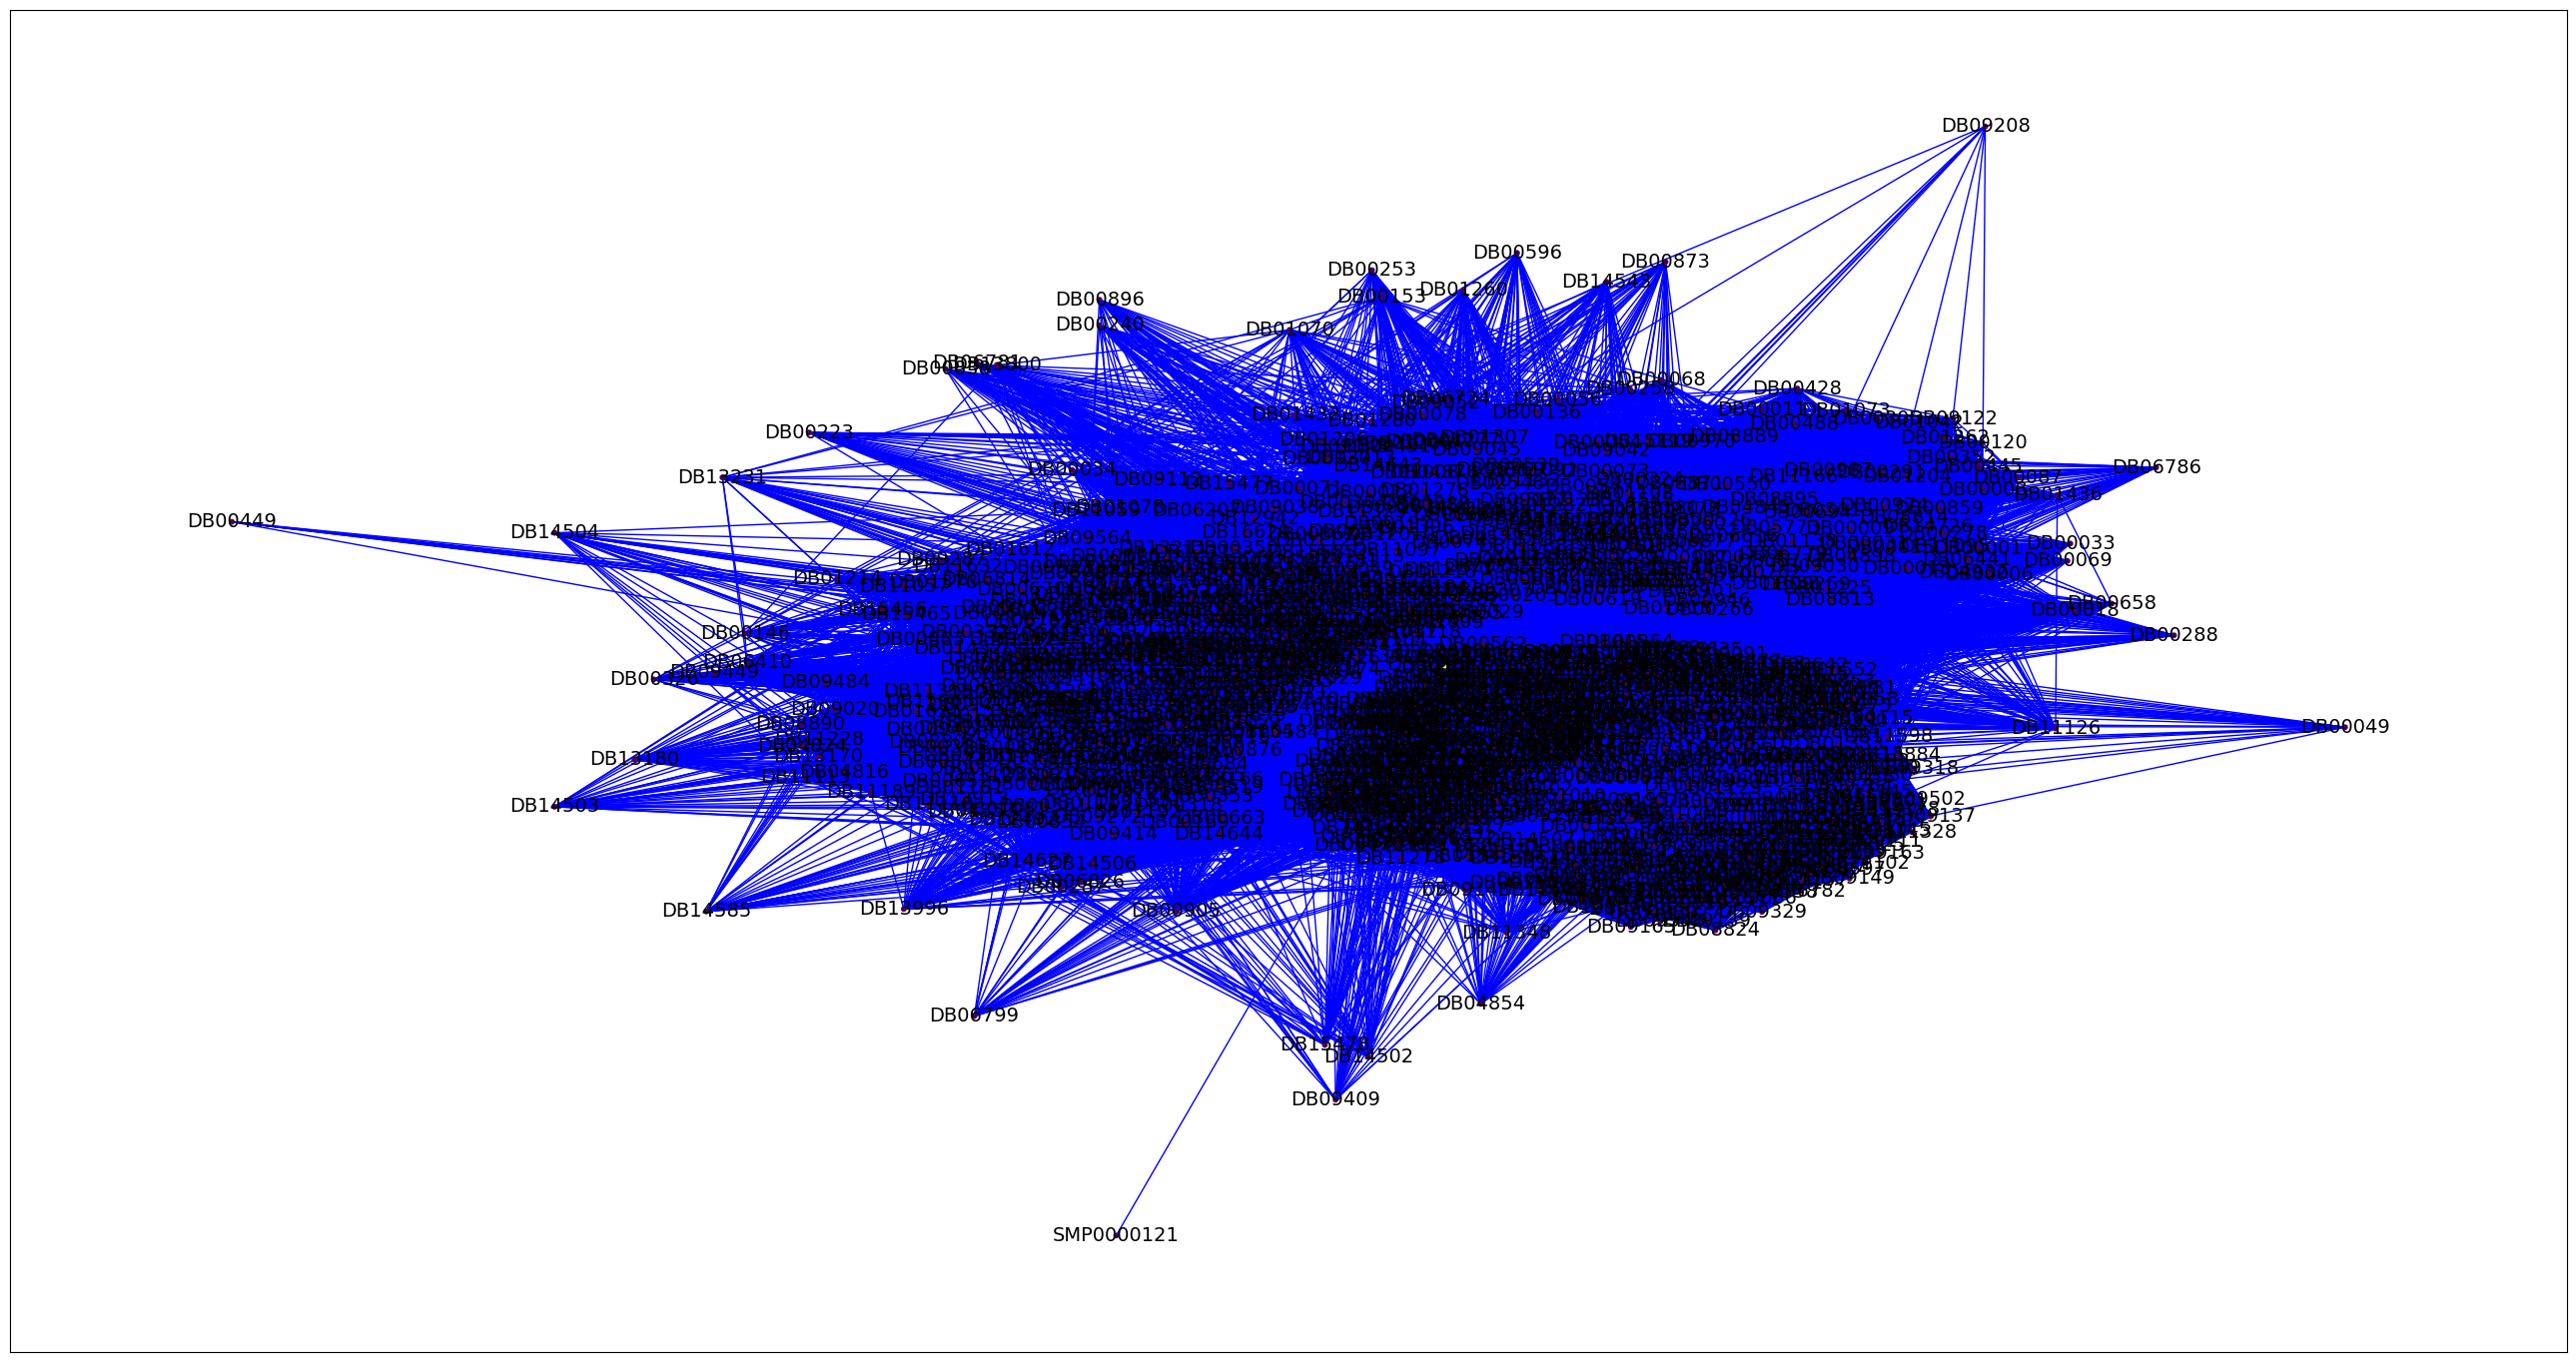

In [54]:
drawnodegraph(G, 'DB01021')